In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
23,850 cases (7 day average) as of Wed 28 Jul, -685.9 since Tue 27 Jul
744 hospitalised (7 day average) as of Sat 31 Jul, -40.7 since Wed 28 Jul
58 died (7 day average) as of Wed 28 Jul, +2.3 since Tue 27 Jul


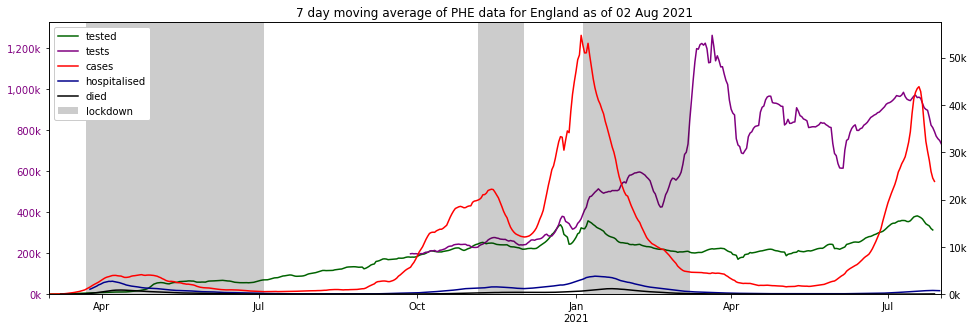

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

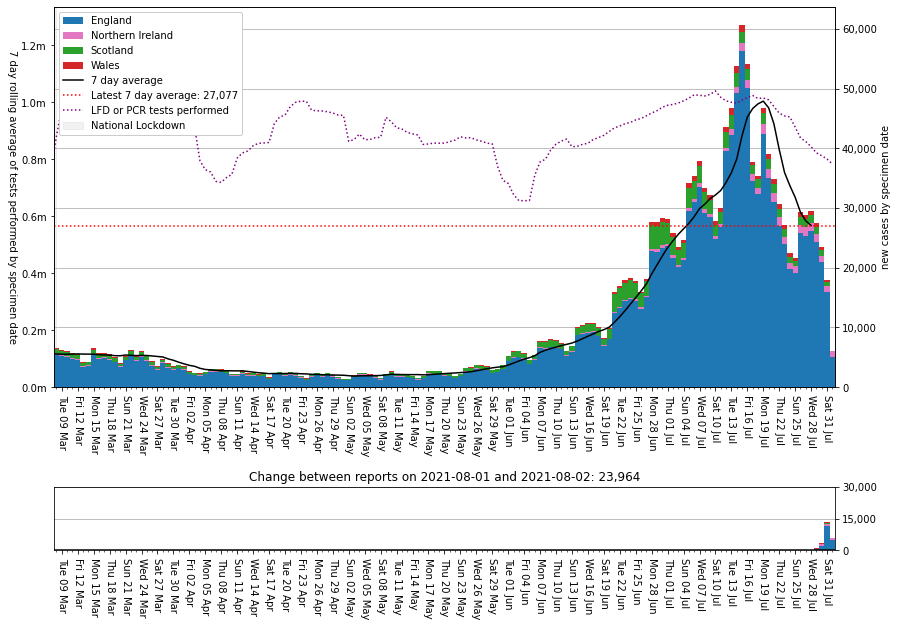

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

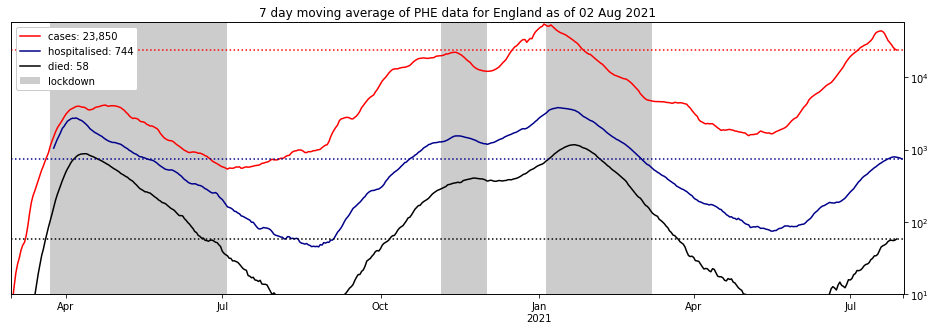

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

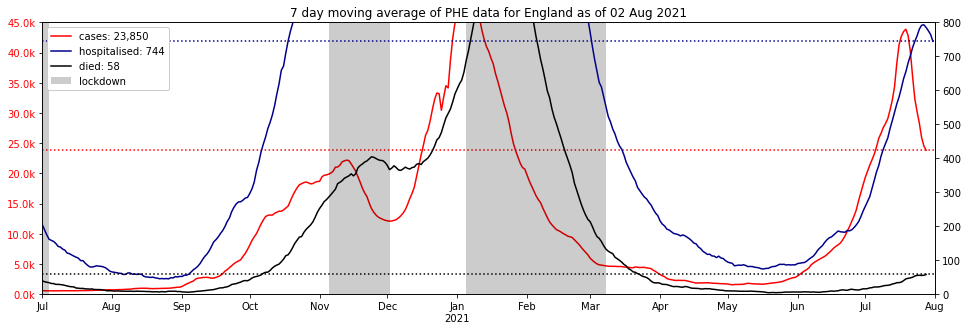

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,01 Aug 21,"+32,134,187","+39,344,009","+32,134,187","+92,556","+18,579","+92,556"
Northern Ireland,01 Aug 21,"+1,048,595","+1,219,389","+1,048,595","+4,686",+657,"+4,686"
Scotland,01 Aug 21,"+3,214,801","+4,012,496","+3,214,801","+16,902","+1,436","+16,902"
Wales,01 Aug 21,"+2,066,442","+2,296,517","+2,066,442","+4,040",+594,"+4,040"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,32134187.0,39344009.0,7209822.0,56286961,57.089931,12.809045,30.101025
1,Northern Ireland,N92000002,1048595.0,1219389.0,170794.0,1893667,55.373780,9.019220,35.607000
2,Scotland,S92000003,3214801.0,4012496.0,797695.0,5463300,58.843574,14.600974,26.555452
3,Wales,W92000004,2066442.0,2296517.0,230075.0,3152879,65.541431,7.297299,27.161271


'partial: 46,872,411 (70.2%), full: 38,464,025'

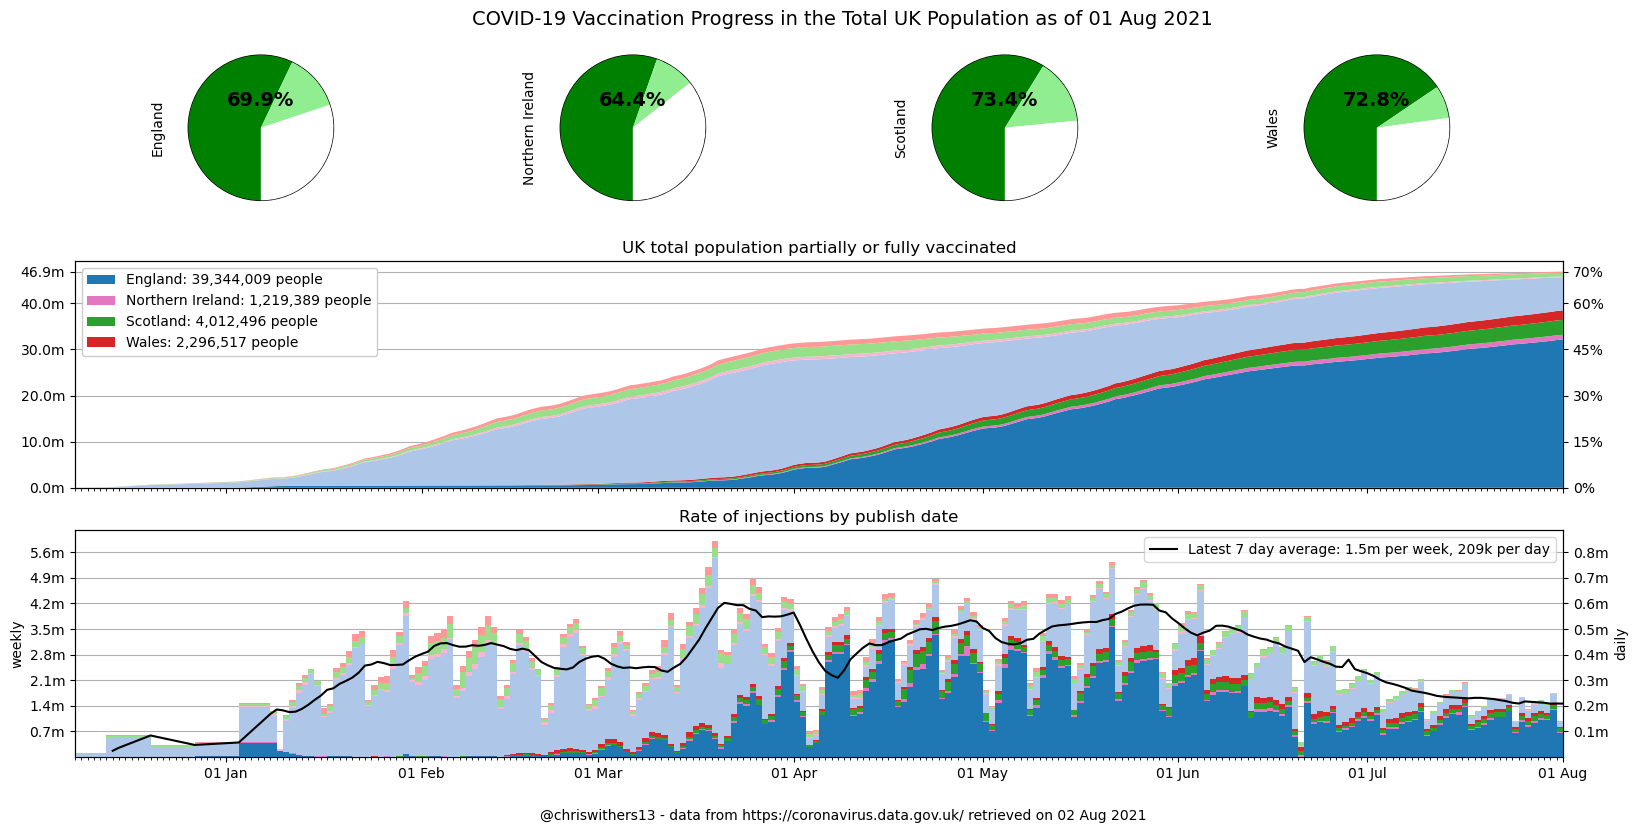

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

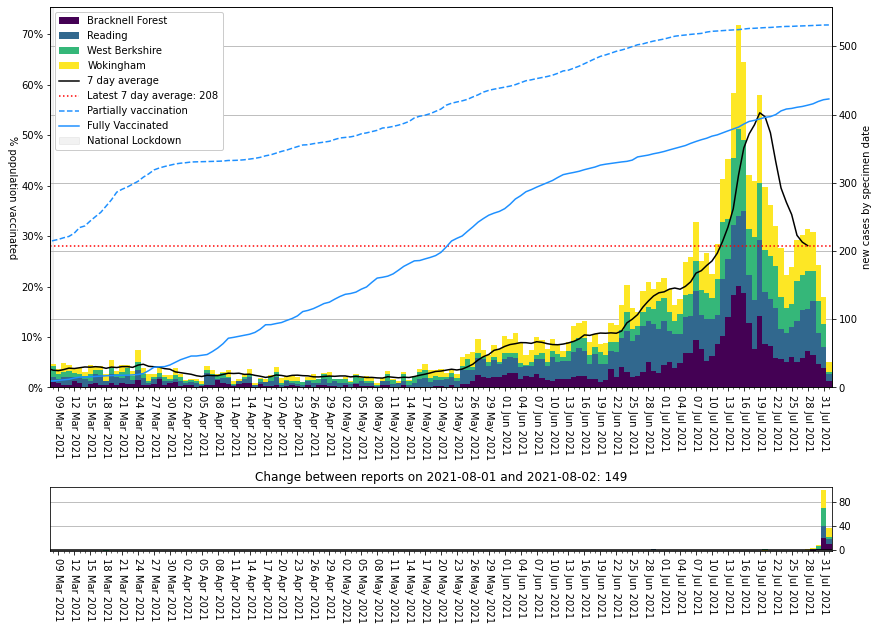

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

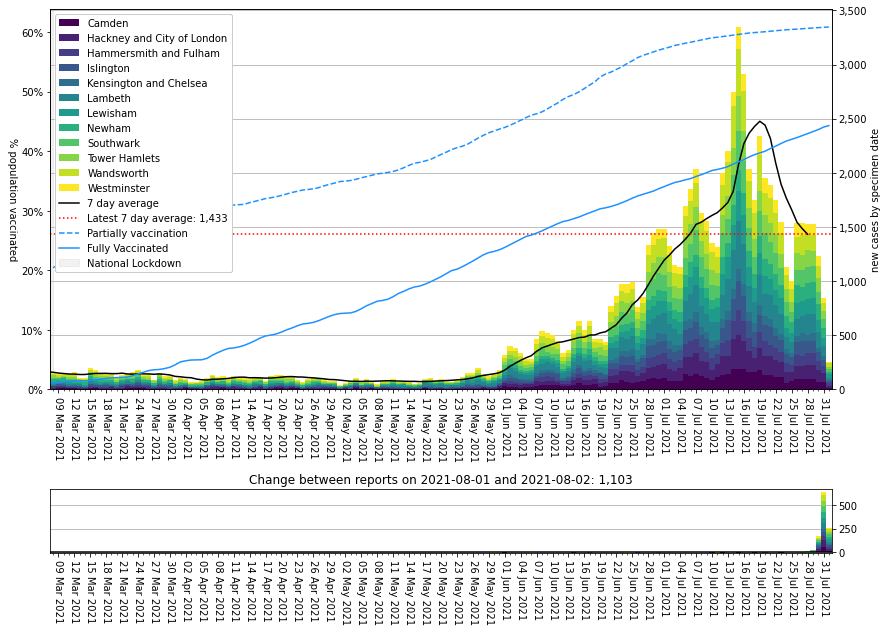

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000138,Lincoln,693.863987,689.0,2021-08-01
N09000003,Belfast,569.944868,1958.0,2021-08-01
E07000041,Exeter,521.289144,685.0,2021-08-01
N09000005,Derry City and Strabane,520.874646,788.0,2021-08-01
N09000009,Mid Ulster,498.895831,741.0,2021-08-01
E06000010,"Kingston upon Hull, City of",481.565029,1251.0,2021-08-01
N09000010,"Newry, Mourne and Down",476.379516,864.0,2021-08-01
E06000058,"Bournemouth, Christchurch and Poole",470.491816,1860.0,2021-08-01
E06000009,Blackpool,448.202171,625.0,2021-08-01


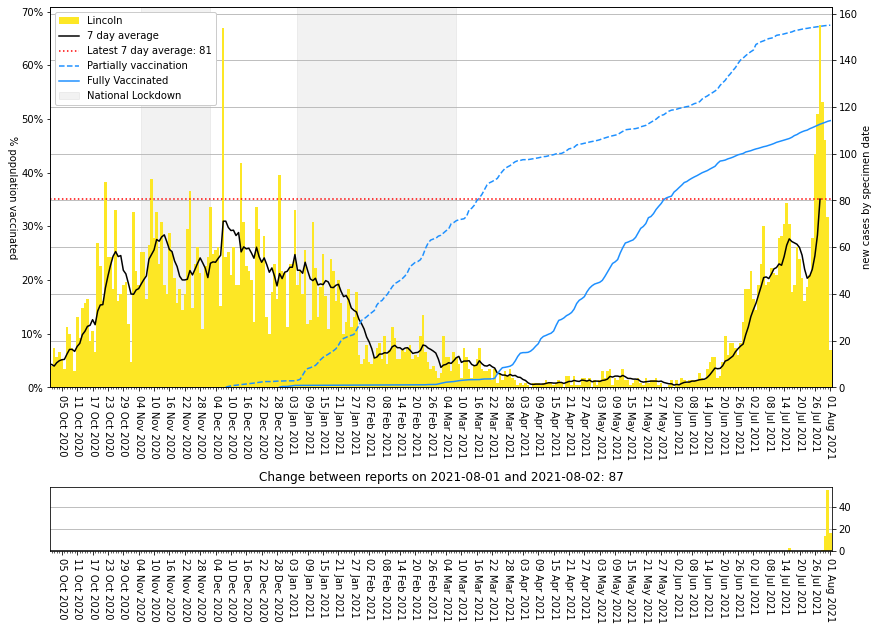

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,271.322175,3098.0,2021-08-01
E08000035,Leeds,337.897897,2680.0,2021-08-01
E08000019,Sheffield,447.462867,2617.0,2021-08-01
N09000003,Belfast,569.944868,1958.0,2021-08-01
E06000058,"Bournemouth, Christchurch and Poole",470.491816,1860.0,2021-08-01
E06000023,"Bristol, City of",373.777723,1732.0,2021-08-01
E08000003,Manchester,306.950429,1697.0,2021-08-01
E08000012,Liverpool,318.848611,1588.0,2021-08-01
E08000032,Bradford,263.257351,1421.0,2021-08-01


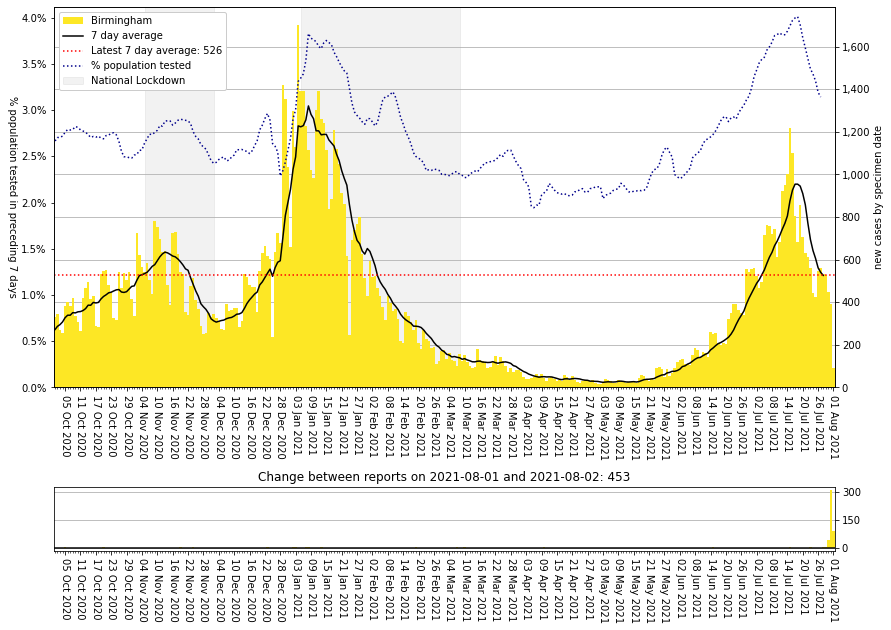

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 0.7

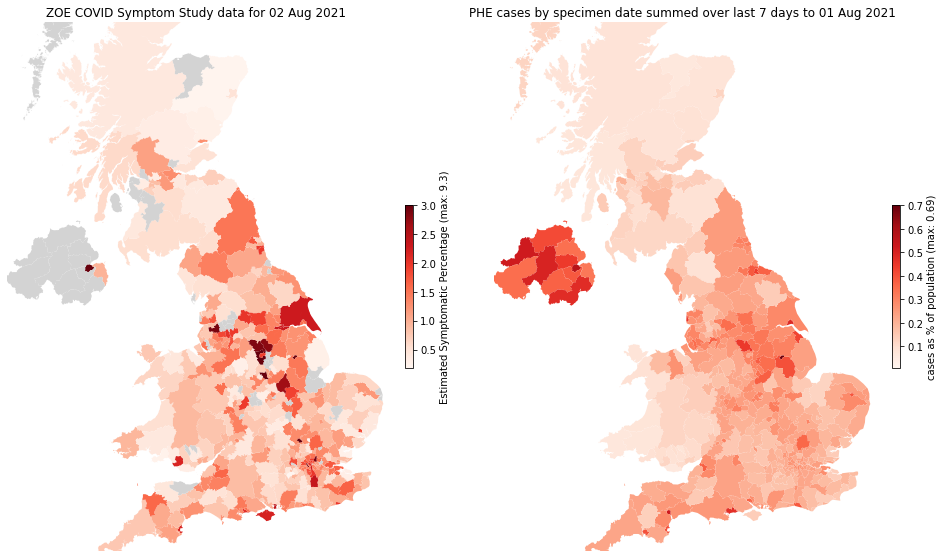

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...